### Actividad Titanic Equipos
 **Programacion para Analisis de Datos**
 
 02/26/2024 
  *** 

Contesten las siguientes preguntas utilizando estadistica descriptiva y funciones de python/pandas:

1. ¿Cuantos pasajeros murieron y sobrevivieron?
2. ¿Hubo alguien que pago demasioado por el boleto?
3. ¿Cual es la media, mediana y moda del costo del ticket?
4. ¿Cual es la varianza de las edades de los pasajeros?
5. ¿Quien es mas probable que sobreviva: Una mujer de 40 años o un hombre de 70 años?
6. Como se distribuyen las edades(sobrevivio o murio) de una persona del titanic?
7. Como se distribuyen los sexos(sobrevivio o murio) de una persona del titanic?

In [238]:
# Importar librerias y documentos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("../data/raw/tested.csv")


# Asignar Passenger Id como indice
df = df.set_index("PassengerId")
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


1. ¿Cuantos pasajeros murieron y sobrevivieron?


In [239]:
sobrevivieron = df["Survived"].value_counts()[1]
murieron = df["Survived"].value_counts()[0]
print(f"Sobrevivieron {sobrevivieron} pasajeros y murieron {murieron}, pasajeros")

Sobrevivieron 152 pasajeros y murieron 266, pasajeros


2. ¿Hubo alguien que pago demasiado por el boleto?


In [240]:
#Rango intercuartilico
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.75)

#Limites 
lower = df.Fare.quantile(0.25) - 1.5 * IQR
upper = df.Fare.quantile(0.75) + 1.5 * IQR

demasiado = df[(df["Fare"]>upper)]
print("Pagaron demasiado", len(cant_demasiado), "personas", "Los que pagaron demasiado por su boleto fueron:")
demasiado


Pagaron demasiado 102 personas Los que pagaron demasiado por su boleto fueron:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
915,0,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
1294,1,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C


3. ¿Cual es la media, mediana y moda del costo del ticket?


In [241]:
media = df["Fare"].mean()
mediana = df["Fare"].median()
moda = df["Fare"].mode()
print(f"La media es {media}, la mediana {mediana} y la moda {moda}")

La media es 35.627188489208635, la mediana 14.4542 y la moda 0    7.75
Name: Fare, dtype: float64


4. ¿Cual es la varianza de las edades de los pasajeros?

In [242]:
#Varianza
var_edades = df["Fare"].var()
print(f"La Varianza es {var_edades}")

La Varianza es 3125.6570743195775


5. ¿Quien es mas probable que sobreviva: Una mujer de 40 años o un hombre de 70 años?


Una mujer de 40 años

In [243]:
#MUJERES
print("Datos Mujeres")
df_mujeres =df[df['Sex']=='female']
num_mujeres=len(df_mujeres)
print(f'El número de mujeres en el barco era de: ',num_mujeres)
edades_female=df_mujeres['Age'].min(),df_mujeres['Age'].max()
print(f'Las edades máximas y mínimas de la mujer eran:', edades_female)

edad = 0
for i in range(10,90,10):
    personas_mujeres = df_mujeres[(df_mujeres['Age']>=edad)&(df_mujeres['Age']<i)]
    sobrevivio_mujeres = personas_mujeres[personas_mujeres["Survived"] == 1]
    print('Mujeres en el rango de edad '+str(edad)+','+str(i),":", len(personas_mujeres), ' De las que sobrevivieron:', len(sobrevivio_mujeres))
    edad = i+1

#HOMBRES 
print("Datos Hombres")
df_hombres=df[df['Sex']=='male']
num_hombres=len(df_hombres)
print(f'El número de hombres en el barco era de: ',num_hombres)
edades= df_hombres['Age'].min(),df_hombres['Age'].max() 
print(f'La edad máxima y mínima del hombre era: ',edades)

edad = 0
for i in range(10,90,10):
    personas_hombres = df_hombres[(df_hombres['Age']>=edad)&(df_hombres['Age']<i)]
    sobrevivio_hombres = personas_hombres[personas_hombres["Survived"] == 1]
    print('Hombres en el rango de edad '+str(edad)+','+str(i),":", len(personas_hombres), ' De los que sobrevivieron:', len(sobrevivio_hombres))
    edad = i+1

#Utilizamos los rangos para ver las probabilidades

#Cantidad mujeres sobrevivientes de 31 a 40 =  20
probabilidad_mujer_40 = 20 / num_personas
#Cantidad hombres sobrevivientes de 61 a 70 =  0
probabilidad_hombre_70 = 0 / num_personas

print (f'\n Probabilidad de supervivencia de una mujer de 40: {probabilidad_mujer_40} Probabilidad de supervivencia de un hombre de 70: {probabilidad_hombre_70}')


Datos Mujeres
El número de mujeres en el barco era de:  152
Las edades máximas y mínimas de la mujer eran: (0.17, 76.0)
Mujeres en el rango de edad 0,10 : 9  De las que sobrevivieron: 9
Mujeres en el rango de edad 11,20 : 18  De las que sobrevivieron: 18
Mujeres en el rango de edad 21,30 : 39  De las que sobrevivieron: 39
Mujeres en el rango de edad 31,40 : 20  De las que sobrevivieron: 20
Mujeres en el rango de edad 41,50 : 14  De las que sobrevivieron: 14
Mujeres en el rango de edad 51,60 : 8  De las que sobrevivieron: 8
Mujeres en el rango de edad 61,70 : 3  De las que sobrevivieron: 3
Mujeres en el rango de edad 71,80 : 1  De las que sobrevivieron: 1
Datos Hombres
El número de hombres en el barco era de:  266
La edad máxima y mínima del hombre era:  (0.33, 67.0)
Hombres en el rango de edad 0,10 : 11  De los que sobrevivieron: 0
Hombres en el rango de edad 11,20 : 21  De los que sobrevivieron: 0
Hombres en el rango de edad 21,30 : 77  De los que sobrevivieron: 0
Hombres en el rango 

6. ¿Como se distribuyen las edades(sobrevivio o murio) de una persona del titanic?

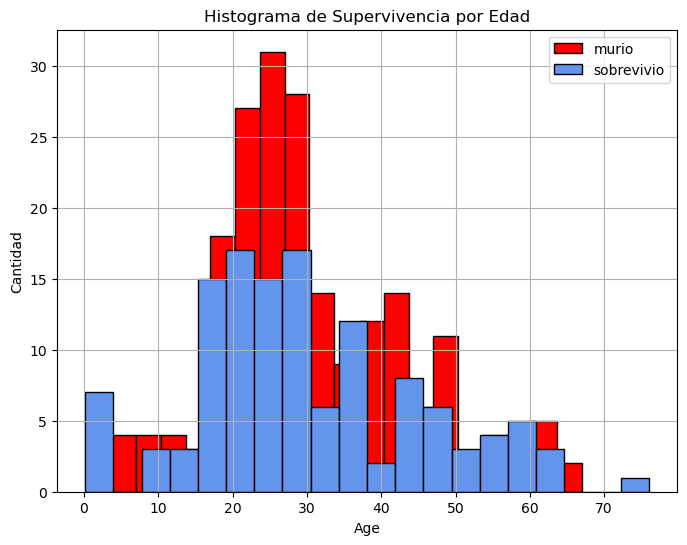

In [244]:
sobrevivio = df[df["Survived"] == 1]
murio = df[df["Survived"] == 0]
columna = 'Age'

plt.figure(figsize=(8, 6))
murio[columna].hist(histtype='barstacked', bins=20, color='red', edgecolor='black', label = 'murio')
sobrevivio[columna].hist(histtype='barstacked', bins=20, color='cornflowerblue', edgecolor='black', label = 'sobrevivio')
plt.title(f'Histograma de Supervivencia por Edad')
plt.xlabel(columna)
plt.ylabel('Cantidad')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

7. ¿Como se distribuyen los sexos(sobrevivio o murio) de una persona del titanic?

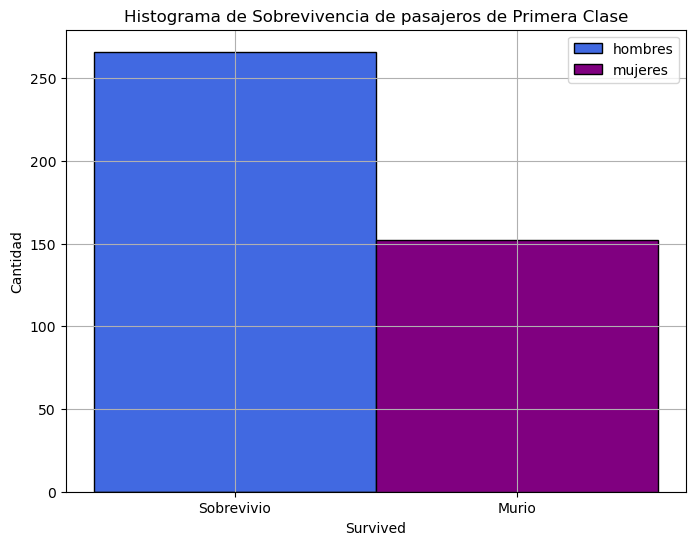

In [245]:
mujeres = df[df["Sex"] == 'female']
hombres = df[df["Sex"] == 'male']
columna = 'Survived'

plt.figure(figsize=(8, 6))
hombres[columna].hist(bins=[-0.5, 0.5, 1.5], color='royalblue', edgecolor='black', align='mid', label='hombres')
mujeres[columna].hist(bins=[-0.5, 0.5, 1.5], color='purple', edgecolor='black', align='mid', label='mujeres')
plt.title(f'Histograma de Sobrevivencia de pasajeros de Primera Clase')
plt.xlabel(columna)
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Sobrevivio', 'Murio'])
plt.grid(True)
plt.legend(loc='upper right')

plt.show()